<a href="https://colab.research.google.com/github/nifemi-alonge/EPF/blob/main/NG_EPF_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Questions

**Please note** that we might not have enough time to go through all of these questions during the interview. However, we will read through your answers before the interview, so please make sure to explain your reasoning in sufficient detail.

1. **Briefly explain conceptually how you would approach this problem**
2. **Present your final model, how the results compare to ground truth and your observations**
3. **Describe your feature selection process**
4. **Compare the performance of your models and describe how you selected the best performing one**
5. **What (if any) simplifying assumptions did you have to make? What additional insight/analysis/data would be required to make your model more robust?**
6. **How would you productionise a model run on a local PC on VBA which takes 10 hours runtime?**
7. **Given we combine separate analysis such as power system software (e.g. PLEXOS), external APIs, and local CSV files, what architectural and process consideration do you need to make when developing and running a model?**

## Answers

1. When trying to conduct forecasting you must consider what your desired output is, data you have available and the resources (analyst time, compute power) you have available. There are a number of both qualitative and quantitative forecasting approaches such as expert judgement, classical time-series models, machine learning and deep learning models.

  When approaching this issue I considered what techniques were appropriate given the provided historic time-series data which included price, demand and more. I also considered what was possible given the time frame. From this, I concluded that either time-series or machine learning methods were appropriate. Expert judgement was not appropriate given my knowledge level of electricity pricing and deep learning models are beyond the scope of this task. Please see the Appendix for a detailed explanation.

  I then explored ARIMA modelling and machine learning methods including XGBoost and Random Forest. ARIMA modelling was not deemed appropriate following exploratory analysis (see appendix for further detail). Therefore, machine learning methods were chosen.

  I then considered how to create the models, what data pre-processing was necessary, how to tune the models, how to produce the results and evaluate them and the models themselves.    
      
2. The final model is the linear regression model defined [here](https://colab.research.google.com/drive/1-0rtWLzQsw7RBblNlyY6pDIMorq7jjOo#scrollTo=bka7kiJ9GHWH&line=4&uniqifier=1) and run [here](https://colab.research.google.com/drive/1-0rtWLzQsw7RBblNlyY6pDIMorq7jjOo#scrollTo=aa5oJa2CItWR&line=5&uniqifier=1). The Root Mean Squared Error (RSME) and Mean Absolute Error (MAE) are both incredibly low, this indicates that my results are very close to the ground truth data. RMSE captures the average error between the predicted and true values, similarly, MAE is the average of the absolute error. For both, a lower value indicates a better and less erroneous model. In addition, [this visualiation](https://colab.research.google.com/drive/1-0rtWLzQsw7RBblNlyY6pDIMorq7jjOo#scrollTo=AaYXalrxQ9DX&line=12&uniqifier=1) illustrates how good the predicted values are; they are exactly mapped to the true data.     

3. I used built-in feature selection methods. Linear regression calculates coefficients that describe how much impact each predictor variable is having on the outcome variable. I extracted these values and ranked them (see [this chart](https://colab.research.google.com/drive/1-0rtWLzQsw7RBblNlyY6pDIMorq7jjOo#scrollTo=1trT_3A2New2&line=1&uniqifier=1)). I did the same for the other models (XGBoost, Random Forest). All showed that 'Price' had the largest impact on the model and the other variables only had a negligible impact, therefore they were removed from the final model and the only selected feature was the historic GB price data.

4. The linear regression model chosen uses only the historic electricity price data as a feature. It was selected because relative to all other models (the linear regression model with many features and all XGBoost and Random Forest models) it has the highest R squared. It is 1 meaning the data perfectly describes the variation in the data. The chosen model also has the lowest RSME and lowest MAE. RMSE and MAE are metrics commonly used to compare and evaluate machine learning models. The error values for the XGBoost and Random Forest model are not high however the values for the linear model are many orders of magnitude lower. That said, the visualisation [here](https://colab.research.google.com/drive/1-0rtWLzQsw7RBblNlyY6pDIMorq7jjOo#scrollTo=00IjfmgYebWT&line=3&uniqifier=1) shows that all models have a high goodness-of-fit.

5. For Linear regression results to be valid several assumptions must be met. These include: linearity between the independent and dependent variables (gb_price and gb_price_2020), independence of errors between observations, normality of the error terms, no multicollinearity, and homoscedasticity. Given the scope of the project it was not proportionate to run tests for all of these assumptions therefore they have assumed to be met and thus the estimates and predicted values are valid.

  Moreover, there were 74 missing values in the GB Price column (73 empty cells and 1 cell with n/e). I imputed these values rather than use complete case analysis to remove the rows from the dataset. I imputed the values based on the mean of the previous 5 values. This is because when looking at the daily pattern, there appears to be a large change every 5 hours so I want each 5 hours to be considered separately. I made the assumption that the mean of the previous 5 rows creates an appropriate simulated value. And that the small number of missing and augmented values has little impact on the model's predictive power. I made the same assumption when imputing demand for france and ireland to maintain consistency.

  Also, the GB temperature data was only provided at a daily level - this does not align with the hourly price data. I wanted to include this dataset when initially creating models therefore I forward filled the data so that each hour of a certain day used that daily temperature. I am making an assumption that the daily average temperature is appropriate to use at each hour of a given day. This variable was not used in the final model therefore this assumption is not having an impact.

  Furthermore, many other variables would have been useful to use features and may have had more impact than the ones tried - economic indicators, geopolitical indicators, generation mix, oil supply numbers, fuel prices from key countries such as OPEC, interconnector supply, and holiday indicators may better explain the trend in electricity prices. What's more, feature engineering or dimensionality reduction could have been used to create new informative features from existing ones; which may have better explained the association.
  
  In addition, other types of analysis could have proven useful. Spatial regression (spatial lag and error models) explains the relationship between variables taking into account the spatial configuration of the observations. GB prices are surely impacted by variables from neighbouring countries however, this has not been picked up in the modelling (low feature importance of price and demand in the neighbouring countries). I could have tested for spatial autocorrelation and then run a spatial regression model.
  
  Lastly, more exploration of the data would have been useful to test the model assumptions were met (e.g. testing for non-linear relationships) and to detect outliers and anomalies and perform any necessary data cleaning.

6. I would firstly assess what the current processes are and consider whether the technology stack could be changed. For instance, R or Python are better at handling big data and have functionality - batching, and generators - to speed up processing. I would consider migrating the analysis to cloud infrastructure rather than use a local machine's compute. AWS, GCP, and Azure allow greater compute power to be harnessed to run a model much more efficiently. They also allow for easy model optimisation. You are able to monitor performance indicators and implement fixes to improve it (e.g. using Azure ML).

  Alternativley, if it was not possible to migrate to the cloud using programming languages then I would look to optimise the VBA. I would research more efficient functions, and try to reduce the number of features (via principal component analysis in Excel). I would also check memory use - if the model is storing intermediate outputs or creating unecessary files removing this might free up memory and aid compute power.

7. Architecturally you need to consider interoperability - whether inputs and outputs from each system are accepted by the next system - this can be determined using system testing and integration testing. Process wise the efficiency of the workflow should be closely monitored - e.g. if high levels of time costly data pre-processing are needed to allow 2 processes to integrate this should be revised if possible. As much automation as possible should be used (e.g. with appropriate software - Apache Airflow, scheduled jobs) to ensure efficiency however automated testing should be implemented so that errors are not carried forward - logging would help track this. It is also important to maintain good security measures and make sure data is being receuved and sent from the intended sources. Finally, regular model monitoring, maintenance, and evaluation are also key.

## Set up

### Packages

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import statsmodels.api as sm

In [106]:
import warnings
warnings.filterwarnings('ignore')

### Set paths

In [107]:
# Note: the paths are specific to my file directory
data_path = "/content/drive/MyDrive/Work/National_Grid_Lead_Data_Scientist_Interview/NG_coding_exercise_EPF/data/"
output_path = "/content/drive/MyDrive/Work/National_Grid_Lead_Data_Scientist_Interview/output/"

In [108]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load in data

### Data pre-processing function

In [109]:
# Function to convert date to datetime type
def preprocess_datetime_column(df, datetime_column):
    # Check the data type of the 'Datetime (UTC)' column
    original_dtype = df[datetime_column].dtypes

    # Convert the datetime_column  to datetime with UTC timezone
    df[datetime_column] = pd.to_datetime(df[datetime_column], utc=True)

    # Check the data type of the datetime_column after conversion
    new_dtype = df[datetime_column].dtypes

    return original_dtype, new_dtype

### Demand

In [110]:
# demand data
demand_df = pd.read_csv(data_path + 'demand/' + 'demand.csv')
demand_df.head()

,Datetime,Country,Source,Demand (MW)
0,2015-01-01 00:00:00+00:00,BE,ENTSOe,9555.0
1,2015-01-01 01:00:00+00:00,BE,ENTSOe,9094.0
2,2015-01-01 02:00:00+00:00,BE,ENTSOe,8691.0
3,2015-01-01 03:00:00+00:00,BE,ENTSOe,8354.0
4,2015-01-01 04:00:00+00:00,BE,ENTSOe,8080.0


In [111]:
# convert date to datetime type
original_dtype, new_dtype = preprocess_datetime_column(demand_df, 'Datetime')

print(f"Original datetime column data type: {original_dtype}")
print(f"New datetime column data type: {new_dtype}")

demand_df.head()

Original datetime column data type: object
New datetime column data type: datetime64[ns, UTC]


,Datetime,Country,Source,Demand (MW)
0,2015-01-01 00:00:00+00:00,BE,ENTSOe,9555.0
1,2015-01-01 01:00:00+00:00,BE,ENTSOe,9094.0
2,2015-01-01 02:00:00+00:00,BE,ENTSOe,8691.0
3,2015-01-01 03:00:00+00:00,BE,ENTSOe,8354.0
4,2015-01-01 04:00:00+00:00,BE,ENTSOe,8080.0


In [112]:
# CHECK dates
print(demand_df['Datetime'].min())
print(demand_df['Datetime'].max())

2015-01-01 00:00:00+00:00
2020-12-31 23:00:00+00:00


### GB Demand

In [113]:
# subset data to create GB demand
gb_demand_df = demand_df[demand_df['Country'] == 'GB']

### Other Demand

In [114]:
# subset
be_demand_df = demand_df[demand_df['Country'] == 'BE']
dk_demand_df = demand_df[demand_df['Country'] == 'DK']
fr_demand_df = demand_df[demand_df['Country'] == 'FR']
de_demand_df = demand_df[demand_df['Country'] == 'DE']
ie_demand_df = demand_df[demand_df['Country'] == 'IE']
nl_demand_df = demand_df[demand_df['Country'] == 'NL']
# Note: no Norway demand data

In [115]:
# List of DataFrames
add_demand = [be_demand_df, dk_demand_df, fr_demand_df, de_demand_df,
                   ie_demand_df, nl_demand_df]

# Define a list of country names corresponding to each DataFrame
country_names = ['belgium', 'denmark', 'france', 'germany', 'ireland',
                 'netherlands']

# Initialize an empty DataFrame to store the merged data
add_demand_df = pd.DataFrame()

# Iterate through the list of DataFrames
for df, country_name in zip(add_demand, country_names):
    # Remove duplicate datetime values within each DataFrame
    df = df.drop_duplicates(subset='Datetime', keep='first')

    # Subset only the 'Datetime' and 'Demand (MW)' columns
    subset_df = df[['Datetime', 'Demand (MW)']]

    # Rename the 'Demand (MW)' column to the country-specific name
    subset_df.rename(columns={'Demand (MW)': f'{country_name}_demand'}, inplace=True)

    # Merge the subset DataFrame with the merged DataFrame
    if add_demand_df.empty:
        add_demand_df = subset_df
    else:
        # Perform a left merge to avoid duplicate rows
        add_demand_df = pd.merge(add_demand_df, subset_df, on='Datetime', how='left')

add_demand_df.head()

,Datetime,belgium_demand,denmark_demand,france_demand,germany_demand,ireland_demand,netherlands_demand
0,2015-01-01 00:00:00+00:00,9555.0,3337.9,71506.350,47445.360,2849.0,11586.0
1,2015-01-01 01:00:00+00:00,9094.0,3223.2,71134.370,45923.710,2651.0,11338.0
2,2015-01-01 02:00:00+00:00,8691.0,3090.7,68840.400,44295.875,2412.0,10917.0
3,2015-01-01 03:00:00+00:00,8354.0,2953.4,65749.414,42868.043,2256.0,10473.0
4,2015-01-01 04:00:00+00:00,8080.0,2888.7,64041.330,42230.930,2170.0,10200.0


### GB Prices

In [116]:
# GB price data
gb_prices_df = pd.read_csv(data_path + 'prices/' + 'Great Britain.csv')
gb_prices_df.head()

,Country,ISO3 Code,Datetime (UTC),Price (GBP/MWhe)
0,Great Britain,GBR,01/01/2015 00:00,0
1,Great Britain,GBR,01/01/2015 01:00,0
2,Great Britain,GBR,01/01/2015 02:00,0
3,Great Britain,GBR,01/01/2015 03:00,0
4,Great Britain,GBR,01/01/2015 04:00,0


In [117]:
# convert date to datetime type
original_dtype, new_dtype = preprocess_datetime_column(gb_prices_df, 'Datetime (UTC)')

print(f"Original datetime column data type: {original_dtype}")
print(f"New datetime column data type: {new_dtype}")

gb_prices_df.head()

Original datetime column data type: object
New datetime column data type: datetime64[ns, UTC]


,Country,ISO3 Code,Datetime (UTC),Price (GBP/MWhe)
0,Great Britain,GBR,2015-01-01 00:00:00+00:00,0
1,Great Britain,GBR,2015-01-01 01:00:00+00:00,0
2,Great Britain,GBR,2015-01-01 02:00:00+00:00,0
3,Great Britain,GBR,2015-01-01 03:00:00+00:00,0
4,Great Britain,GBR,2015-01-01 04:00:00+00:00,0


In [118]:
# CHECK dates
print(gb_prices_df['Datetime (UTC)'].min())
print(gb_prices_df['Datetime (UTC)'].max())

2015-01-01 00:00:00+00:00
2020-12-31 23:00:00+00:00


### Other Prices

In [119]:
# load in other prices
be_prices_df = pd.read_csv(data_path + 'prices/' + 'Belgium.csv')
dk_prices_df = pd.read_csv(data_path + 'prices/' + 'Denmark.csv')
fr_prices_df = pd.read_csv(data_path + 'prices/' + 'France.csv')
de_prices_df = pd.read_csv(data_path + 'prices/' + 'Germany.csv')
ie_prices_df = pd.read_csv(data_path + 'prices/' + 'Ireland.csv')
nl_prices_df = pd.read_csv(data_path + 'prices/' + 'Netherlands.csv')
no_prices_df = pd.read_csv(data_path + 'prices/' + 'Norway.csv')

In [120]:
# convert date to datetime type

# List of DataFrames
add_prices = [be_prices_df, dk_prices_df, fr_prices_df, de_prices_df,
                   ie_prices_df, nl_prices_df, no_prices_df]

# Specify the column name
column_name = 'Datetime (UTC)'

# Apply the function to each DataFrame in the list
for df in add_prices:
    original_dtype, new_dtype = preprocess_datetime_column(df, column_name)
    print(f"Original 'Datetime (UTC)' column data type: {original_dtype}")
    print(f"New 'Datetime (UTC)' column data type: {new_dtype}")

Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]
Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]
Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]
Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]
Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]
Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]
Original 'Datetime (UTC)' column data type: object
New 'Datetime (UTC)' column data type: datetime64[ns, UTC]


In [121]:
# Define a list of country names corresponding to each DataFrame
country_names = ['belgium', 'denmark', 'france', 'germany', 'ireland',
                 'netherlands', 'norway']

# Initialize an empty DataFrame to store the merged data
add_prices_df = pd.DataFrame()

# Iterate through the list of DataFrames
for df, country_name in zip(add_prices, country_names):
    # Subset only the 'datetime' and 'price_' columns
    subset_df = df[['Datetime (UTC)', 'Price (EUR/MWhe)']]

    # Rename the 'price_' column to the country-specific name
    subset_df.rename(columns={'Price (EUR/MWhe)': f'{country_name}_price'}, inplace=True)

    # Merge the subset DataFrame with the merged DataFrame
    if add_prices_df.empty:
        add_prices_df = subset_df
    else:
        add_prices_df = pd.merge(add_prices_df, subset_df, on='Datetime (UTC)', how='outer')

add_prices_df.head()

,Datetime (UTC),belgium_price,denmark_price,france_price,germany_price,ireland_price,netherlands_price,norway_price
0,2015-01-01 00:00:00+00:00,34.94,18.29,34.94,17.93,138.97,34.94,27.36
1,2015-01-01 01:00:00+00:00,32.19,16.04,32.19,15.17,74.78,32.19,27.24
2,2015-01-01 02:00:00+00:00,28.05,14.60,23.53,16.38,72.99,28.05,27.16
3,2015-01-01 03:00:00+00:00,28.04,14.95,22.92,17.38,78.79,28.04,27.15
4,2015-01-01 04:00:00+00:00,34.26,14.50,34.26,16.38,84.79,34.26,27.30


### GB Weather

In [122]:
# GB weather data
# Note: daily not hourly
weather_df = pd.read_excel(data_path + 'weather/' + 'UK_daily_temp.xlsx')
weather_df.head()

,Datetime,Temperature (Celsius)
0,20150101,7.5
1,20150102,6.9
2,20150103,3.7
3,20150104,1.5
4,20150105,3.9


In [123]:
# CHECK dates
print(weather_df['Datetime'].min())
print(weather_df['Datetime'].max())

20150101
20201231


In [124]:
# convert date to datetime type
# Convert the integer column to a string
weather_df['Datetime'] = weather_df['Datetime'].astype(str)

# Use string formatting to create the desired format
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime'], format='%Y%m%d')

# Set the UTC timezone to the datetime column
weather_df['Datetime'] = weather_df['Datetime'].dt.tz_localize('UTC')

In [125]:
# CHECK dates
print(weather_df['Datetime'].min())
print(weather_df['Datetime'].max())

2015-01-01 00:00:00+00:00
2020-12-31 00:00:00+00:00


## Creating combined dataset

In [126]:
# merging datasets into one gb_dataset
gb_dataset = pd.merge(gb_prices_df, gb_demand_df[['Demand (MW)', 'Datetime']], left_on='Datetime (UTC)', right_on='Datetime', how='left')
gb_dataset = pd.merge(gb_dataset, weather_df, left_on='Datetime (UTC)', right_on='Datetime', how='left')
gb_dataset = pd.merge(gb_dataset, add_prices_df, on='Datetime (UTC)', how='left')
gb_dataset = pd.merge(gb_dataset, add_demand_df, left_on='Datetime (UTC)', right_on='Datetime', how='left')

# forward fill temperature
gb_dataset['Temperature (Celsius)'].ffill(inplace=True)

# drop columns
columns_to_drop = ['Datetime_x', 'Datetime_y','Country', 'ISO3 Code', 'Datetime']

# drop the specified columns
gb_dataset.drop(columns=columns_to_drop, inplace=True)

# Define a dictionary to map old column names to new column names
column_rename_mapping = {
    'Datetime (UTC)': 'Datetime',
    'Price (GBP/MWhe)': 'gb_price',
    'Demand (MW)': 'gb_demand',
    'Temperature (Celsius)': 'gb_temp'
}

# rename the specified columns
gb_dataset.rename(columns=column_rename_mapping, inplace=True)

gb_dataset.tail()

,Datetime,gb_price,gb_demand,gb_temp,belgium_price,denmark_price,france_price,germany_price,ireland_price,netherlands_price,norway_price,belgium_demand,denmark_demand,france_demand,germany_demand,ireland_demand,netherlands_demand
52603,2020-12-31 19:00:00+00:00,61.04,38697.5,-1.3,56.79,56.70,56.75,56.70,64.28,56.64,23.88,9794.50,4091.0,66763.0,51019.75,4259.0,12977.25
52604,2020-12-31 20:00:00+00:00,60.39,35833.0,-1.3,52.44,52.44,52.44,52.44,62.66,52.44,23.80,9386.25,3874.0,64102.0,48681.25,3954.0,12278.75
52605,2020-12-31 21:00:00+00:00,57.96,33026.5,-1.3,51.86,51.86,51.86,51.86,56.90,51.86,23.67,9582.00,3674.0,65097.0,47451.00,3689.5,11835.50
52606,2020-12-31 22:00:00+00:00,55.02,30714.5,-1.3,52.26,52.26,52.26,52.26,50.70,52.26,23.00,9683.50,3506.0,66913.0,45235.25,3467.5,11573.75
52607,2020-12-31 23:00:00+00:00,n/e,28975.0,-1.3,50.87,50.87,50.87,50.87,55.09,50.87,23.79,9296.00,3482.0,65761.0,44586.00,3423.5,11409.50


In [127]:
# handling missing price data

# price has 73 missing values in 2016
print(gb_dataset['gb_price'].isna().sum())

# dealing with missing price value fpr 2020-12-31 23:00:00+00:00
# Replace 'n/e' with NaN for consistent handling
gb_dataset['gb_price'].replace('n/e', np.nan, inplace=True)

# Convert the 'gb_price' column to float
gb_dataset['gb_price'] = gb_dataset['gb_price'].astype(float)

# Find the indices of NaN values in the 'gb_price' column
nan_indices = gb_dataset.index[gb_dataset['gb_price'].isna()]

# Define the number of previous values to consider for imputation
num_previous_values = 5

# Loop through each NaN index and impute the value
for index_to_replace in nan_indices:
    # Calculate the imputed value based on the previous 5 valid values
    previous_values = gb_dataset.loc[index_to_replace - num_previous_values:index_to_replace - 1, 'gb_price']
    imputed_value = np.mean(previous_values)

    imputed_value = round(imputed_value, 2)

    # Replace NaN with the imputed value
    gb_dataset.at[index_to_replace, 'gb_price'] = imputed_value

# Verify that all missing values have been imputed
print("Number of remaining NaN values:", gb_dataset['gb_price'].isna().sum())

73
Number of remaining NaN values: 0


In [128]:
# handing issing data in france_demand ireland_demand
def impute_demand_columns(df, column_name, num_previous_values=5):
    """
    Impute missing values in the specified column using the mean of the previous valid values.

    Parameters:
    - df: DataFrame containing the dataset.
    - column_name: Name of the column to impute.
    - num_previous_values: Number of previous valid values to consider for imputation.

    Returns:
    - df: The DataFrame with missing values imputed in the specified column.
    """

    # Find the indices of NaN values in the specified column
    nan_indices = df.index[df[column_name].isna()]

    # Loop through each NaN index and impute the value
    for index_to_replace in nan_indices:
        # Calculate the imputed value based on the previous valid values
        previous_values = df.loc[index_to_replace - num_previous_values:index_to_replace - 1, column_name]
        imputed_value = np.mean(previous_values)

        imputed_value = round(imputed_value, 2)

        # Replace NaN with the imputed value
        df.at[index_to_replace, column_name] = imputed_value

    # Verify that all missing values have been imputed
    remaining_nan_count = df[column_name].isna().sum()
    if remaining_nan_count == 0:
        print(f"All missing values in '{column_name}' have been imputed.")
    else:
        print(f"Number of remaining NaN values in '{column_name}': {remaining_nan_count}")

    return df

In [129]:
# imputing for demand data
gb_dataset = impute_demand_columns(gb_dataset, 'france_demand')
gb_dataset = impute_demand_columns(gb_dataset, 'ireland_demand')

All missing values in 'france_demand' have been imputed.
All missing values in 'ireland_demand' have been imputed.


## Modelling

In [130]:
# define train test split and features for all models

# Split the data into training and testing datasets based on date
train_data = gb_dataset[gb_dataset['Datetime'].dt.year < 2020]  # Data from 2015-2019
test_data = gb_dataset[gb_dataset['Datetime'].dt.year == 2020]  # Data for 2020

# Define  feature columns

# full list of features available
features = ['gb_demand', 'gb_price', 'gb_temp', 'belgium_price',
                   'denmark_price', 'france_price', 'germany_price',
                   'ireland_price',	'netherlands_price',	'norway_price',
                   'belgium_demand',	'denmark_demand',	'france_demand',
                   'germany_demand',	'ireland_demand',	'netherlands_demand']

# final features after feature selection
features_final = ['gb_price']

### Model 1 - Linear Regression

In [131]:
# CREATE FUNCTION

def train_and_predict_linear_regression(features,
                                        output_name,
                                        save_csv,
                                        show_feature_importance):
    # Initialize and train a Linear Regression model
    model = LinearRegression()
    model.fit(train_data[features], train_data['gb_price'])

    # Make predictions on the test set
    y_pred = model.predict(test_data[features])

    # Evaluate the model
    rmse = mean_squared_error(test_data['gb_price'], y_pred, squared=False)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    r2 = r2_score(test_data['gb_price'], y_pred)
    print(f"R-squared: {r2:.2f}")

    mae = mean_absolute_error(test_data['gb_price'], y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Train the final model on the full dataset
    model.fit(gb_dataset[features], gb_dataset['gb_price'])  # Using the entire dataset for training

    # Predict electricity prices for 2020
    lr_predicted_2020_prices = model.predict(test_data[features])

    # Round predicted prices to 1 decimal place
    lr_predicted_2020_prices = np.round(lr_predicted_2020_prices, 1)

    # Create a DataFrame with datetime and predicted prices
    lr_results_df = pd.DataFrame({'Datetime': test_data['Datetime'],
                                  'Price': lr_predicted_2020_prices})

    # Save results to CSV
    if save_csv:
      lr_results_df.to_csv(output_path + output_name, index=False)

    # Calculate feature importance using coefs
    coefficients = model.coef_
    feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

    # Sort by absolute coefficient value (importance)
    feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

    # Visualize feature importance
    if show_feature_importance:
      plt.figure(figsize=(10, 6))
      sns.barplot(x='Coefficient', y='Feature', data=feature_importance, orient='h')
      plt.xlabel('Coefficient (Feature Importance)')
      plt.ylabel('Feature')
      plt.title('Feature Importance in Linear Regression')
      plt.show()

    return lr_predicted_2020_prices

Root Mean Squared Error (RMSE): 9.476164552868568e-13
R-squared: 1.00
Mean Absolute Error (MAE): 7.819933517086373e-13


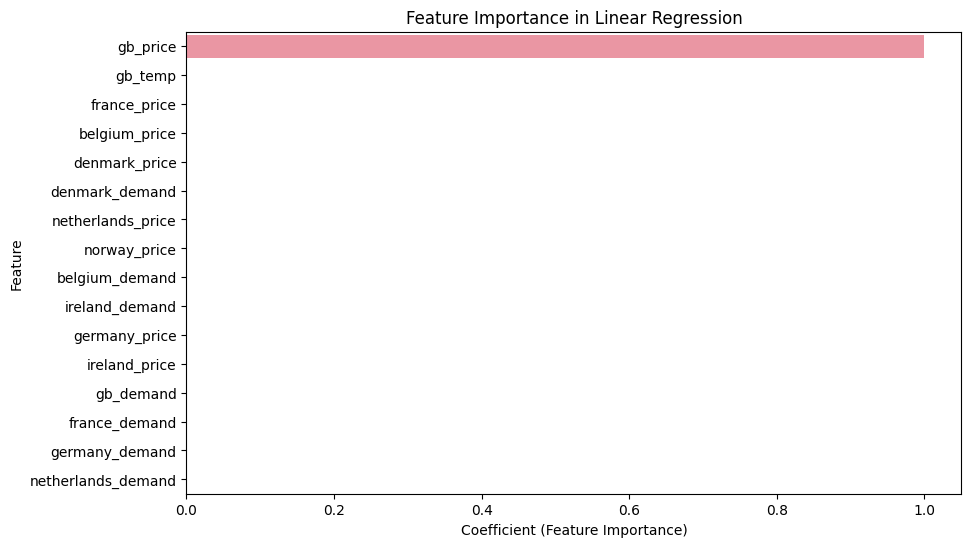

array([43.4, 41.1, 30. , ..., 58. , 55. , 61.1])

In [132]:
# run on features
train_and_predict_linear_regression(features,
                                    'predicted_prices_2020_linear_reg.csv',
                                    save_csv=False,
                                    show_feature_importance=True)

In [133]:
# run on features_final
lr_predicted_2020_prices = train_and_predict_linear_regression(features_final,
                                                               'predicted_prices_2020_linear_reg.csv',
                                                               save_csv=True,
                                                               show_feature_importance=False)

Root Mean Squared Error (RMSE): 9.608225582062903e-15
R-squared: 1.00
Mean Absolute Error (MAE): 7.439655486987495e-15


### Model 2 - XGBoost

In [61]:
# CREATE FUNCTION

def train_and_predict_xgboost_model(features,
                                    output_name,
                                    save_csv,
                                    show_feature_importance):
    # Initialize and train an XGBoost Regressor model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(train_data[features], train_data['gb_price'])

    # Get feature importances
    importances_xgb = model.feature_importances_

    # Match feature importances with feature names
    feature_names = train_data[features].columns
    feature_importance_xgb = dict(zip(feature_names, importances_xgb))

    # Sort feature importances by importance value
    sorted_feature_importance_xgb = sorted(feature_importance_xgb.items(),
                                           key=lambda x: x[1], reverse=True)

    # Print or visualize the sorted feature importances
    if show_feature_importance:
      print("Feature Importances:")
      for feature, importance in sorted_feature_importance_xgb:
          print(f"{feature}: {importance:.4f}")

    # Make predictions on the test set
    y_pred = model.predict(test_data[features])

    # Evaluate the model
    rmse = mean_squared_error(test_data['gb_price'], y_pred, squared=False)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    r2 = r2_score(test_data['gb_price'], y_pred)
    print(f"R-squared: {r2:.2f}")

    mae = mean_absolute_error(test_data['gb_price'], y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Train the final model on the full dataset
    model.fit(gb_dataset[features], gb_dataset['gb_price'])  # Using the entire dataset for training

    # Predict electricity prices for 2020
    xgb_predicted_2020_prices = model.predict(test_data[features])

    # Round predicted prices to 1 decimal place
    xgb_predicted_2020_prices = np.round(xgb_predicted_2020_prices, 1)

    # Create a DataFrame with datetime and predicted prices
    xgb_results_df = pd.DataFrame({'Datetime': test_data['Datetime'],
                                   'Price': xgb_predicted_2020_prices})

    # Save results to CSV
    if save_csv:
      xgb_results_df.to_csv(output_path + output_name, index=False)

    return xgb_predicted_2020_prices

In [62]:
# run on features
train_and_predict_xgboost_model(features,
                                'predicted_prices_2020_xgboost.csv',
                                save_csv=False,
                                show_feature_importance=True)

Feature Importances:
gb_price: 0.9978
belgium_price: 0.0003
netherlands_price: 0.0003
gb_demand: 0.0003
denmark_price: 0.0002
germany_price: 0.0002
gb_temp: 0.0002
germany_demand: 0.0001
netherlands_demand: 0.0001
ireland_demand: 0.0001
norway_price: 0.0001
ireland_price: 0.0001
belgium_demand: 0.0001
denmark_demand: 0.0001
france_demand: 0.0000
france_price: 0.0000
Root Mean Squared Error (RMSE): 1.2678749443505957
R-squared: 0.99
Mean Absolute Error (MAE): 0.13640504453733707


array([43.5, 41.1, 30. , ..., 58. , 55. , 61.1], dtype=float32)

In [63]:
# run on features_final
xgb_predicted_2020_prices = train_and_predict_xgboost_model(features_final,
                                                            'predicted_prices_2020_xgboost.csv',
                                                            save_csv=False,
                                                            show_feature_importance=False)

Root Mean Squared Error (RMSE): 1.2506469201081556
R-squared: 0.99
Mean Absolute Error (MAE): 0.14002089380040655


### Model 3 - Random Forest

In [64]:
# CREATE FUNCTION

def train_and_predict_random_forest_model(features, output_name, save_csv,show_feature_importance):
    # Initialize and train a Random Forest Regressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(train_data[features], train_data['gb_price'])

    # Get feature importances
    importances_rf = model.feature_importances_

    # Match feature importances with feature names
    feature_names = train_data[features].columns
    feature_importance_rf = dict(zip(feature_names, importances_rf))

    # Sort feature importances by importance value
    sorted_feature_importance_rf = sorted(feature_importance_rf.items(),
                                          key=lambda x: x[1], reverse=True)

    # Print or visualize the sorted feature importances
    if show_feature_importance:
      print("Feature Importances:")
      for feature, importance in sorted_feature_importance_rf:
          print(f"{feature}: {importance:.4f}")

    # Make predictions on the test set
    y_pred = model.predict(test_data[features])

    # Evaluate the model
    rmse = mean_squared_error(test_data['gb_price'], y_pred, squared=False)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    r2 = r2_score(test_data['gb_price'], y_pred)
    print(f"R-squared: {r2:.2f}")

    mae = mean_absolute_error(test_data['gb_price'], y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Train the final model on the full dataset
    model.fit(gb_dataset[features], gb_dataset['gb_price'])  # Using the entire dataset for training

    # Predict electricity prices for 2020
    rf_predicted_2020_prices = model.predict(test_data[features])

    # Round predicted prices to 1 decimal place
    rf_predicted_2020_prices = np.round(rf_predicted_2020_prices, 1)

    # Create a DataFrame with datetime and predicted prices
    rf_results_df = pd.DataFrame({'Datetime': test_data['Datetime'],
                                  'Price': rf_predicted_2020_prices})

    # Save results to CSV
    if save_csv:
      rf_results_df.to_csv(output_path + 'predicted_prices_2020_random_forest.csv',
                           index=False)

    return rf_predicted_2020_prices

In [65]:
train_and_predict_random_forest_model(features,
                                      'predicted_prices_2020_random_forest.csv',
                                      save_csv=False,
                                      show_feature_importance=True)

Feature Importances:
gb_price: 0.9952
germany_price: 0.0007
france_price: 0.0006
ireland_demand: 0.0005
gb_demand: 0.0005
netherlands_demand: 0.0005
ireland_price: 0.0004
belgium_demand: 0.0003
france_demand: 0.0002
gb_temp: 0.0002
denmark_price: 0.0002
belgium_price: 0.0002
germany_demand: 0.0001
norway_price: 0.0001
denmark_demand: 0.0001
netherlands_price: 0.0001
Root Mean Squared Error (RMSE): 1.4296778744379195
R-squared: 0.99
Mean Absolute Error (MAE): 0.10324602686704352


array([43.4, 41.1, 30. , ..., 58. , 55. , 61.1])

In [66]:
rf_predicted_2020_prices = train_and_predict_random_forest_model(features_final,
                                                                 'predicted_prices_2020_random_forest.csv',
                                                                 save_csv=False,
                                                                 show_feature_importance=False)

Root Mean Squared Error (RMSE): 1.2803030797337154
R-squared: 0.99
Mean Absolute Error (MAE): 0.09043760245903902


## Visualisations (EDA and Evaluation)

### GB 2015-2020 Time Series

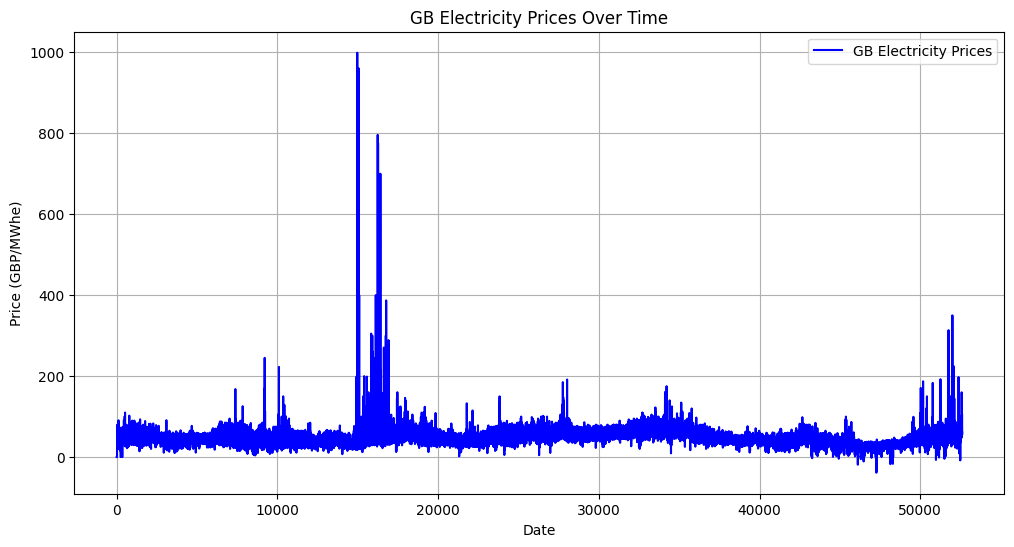

In [67]:
# Plot the GB Prices time series
plt.figure(figsize=(12, 6))
plt.plot(gb_dataset.index, gb_dataset['gb_price'], color='blue', label='GB Electricity Prices')
plt.title('GB Electricity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (GBP/MWhe)')
plt.grid(True)
plt.legend()
plt.show()

### GB 1 month Time Series

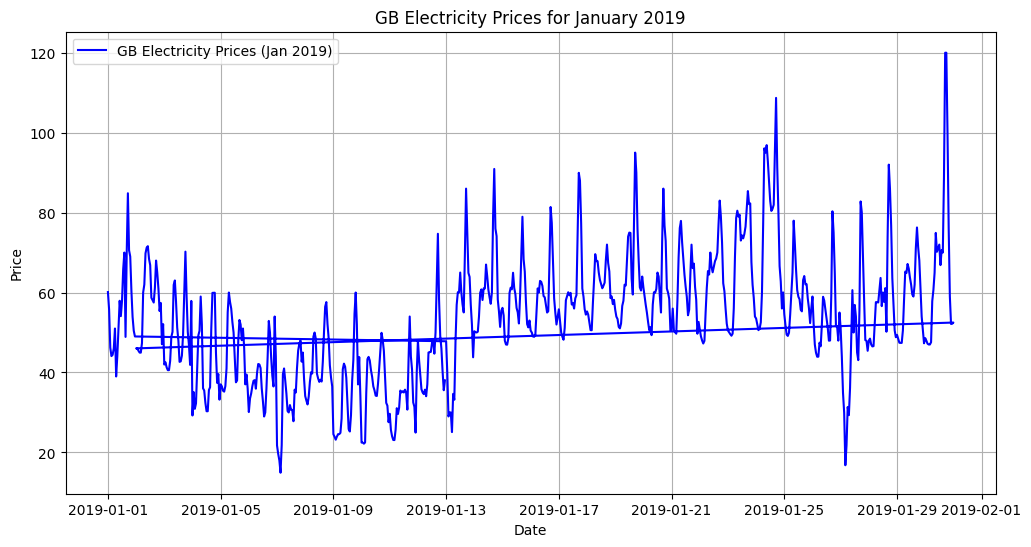

In [68]:
# Filter the DataFrame to include only data for January 2019
january_2019_prices = gb_dataset[(gb_dataset['Datetime'] >= '2019-01-01') &
                                 (gb_dataset['Datetime'] <= '2019-01-31')]

# Plot the time series for January 2019
plt.figure(figsize=(12, 6))
plt.plot(january_2019_prices['Datetime'], january_2019_prices['gb_price'],
         color='blue', label='GB Electricity Prices (Jan 2019)')
plt.title('GB Electricity Prices for January 2019')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

### GB Multiple Days Hourly Time Series

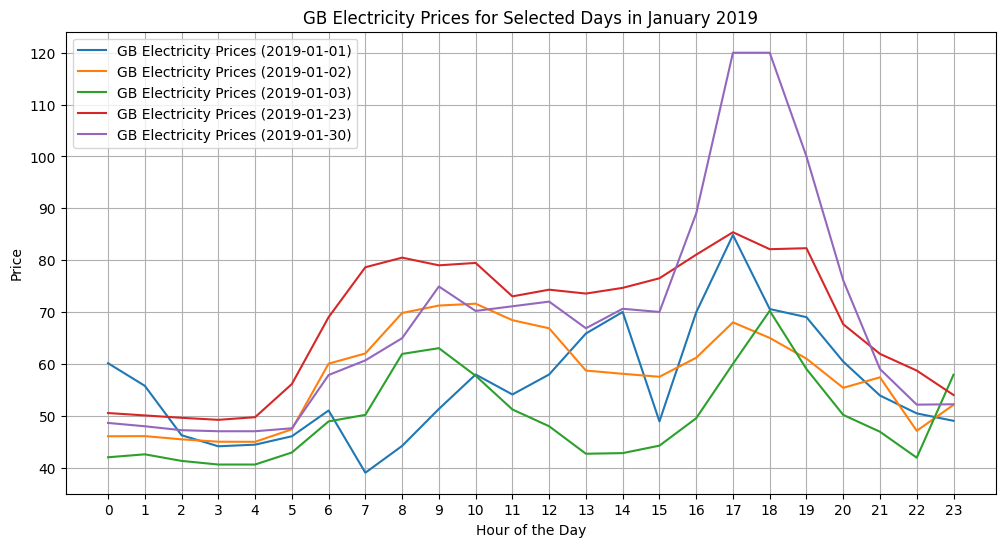

In [69]:
# List of dates to plot
dates_to_plot = ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-23', '2019-01-30']

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Loop through each date and plot hourly prices
for date in dates_to_plot:
    # Filter the DataFrame for the specific date
    daily_prices = gb_dataset[gb_dataset['Datetime'].dt.date == pd.to_datetime(date).date()]

    # Extract the hour from the 'Datetime' column
    daily_prices['Hour'] = daily_prices['Datetime'].dt.hour

    # Plot hourly prices for the day
    plt.plot(daily_prices['Hour'], daily_prices['gb_price'],
             label=f'GB Electricity Prices ({date})')

# Customize the plot
plt.title('GB Electricity Prices for Selected Days in January 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# Show more x-axis ticks
plt.xticks(range(24))  # Show ticks for all 24 hours

# Show the plot
plt.show()

### GB Multiple Years Seasonality

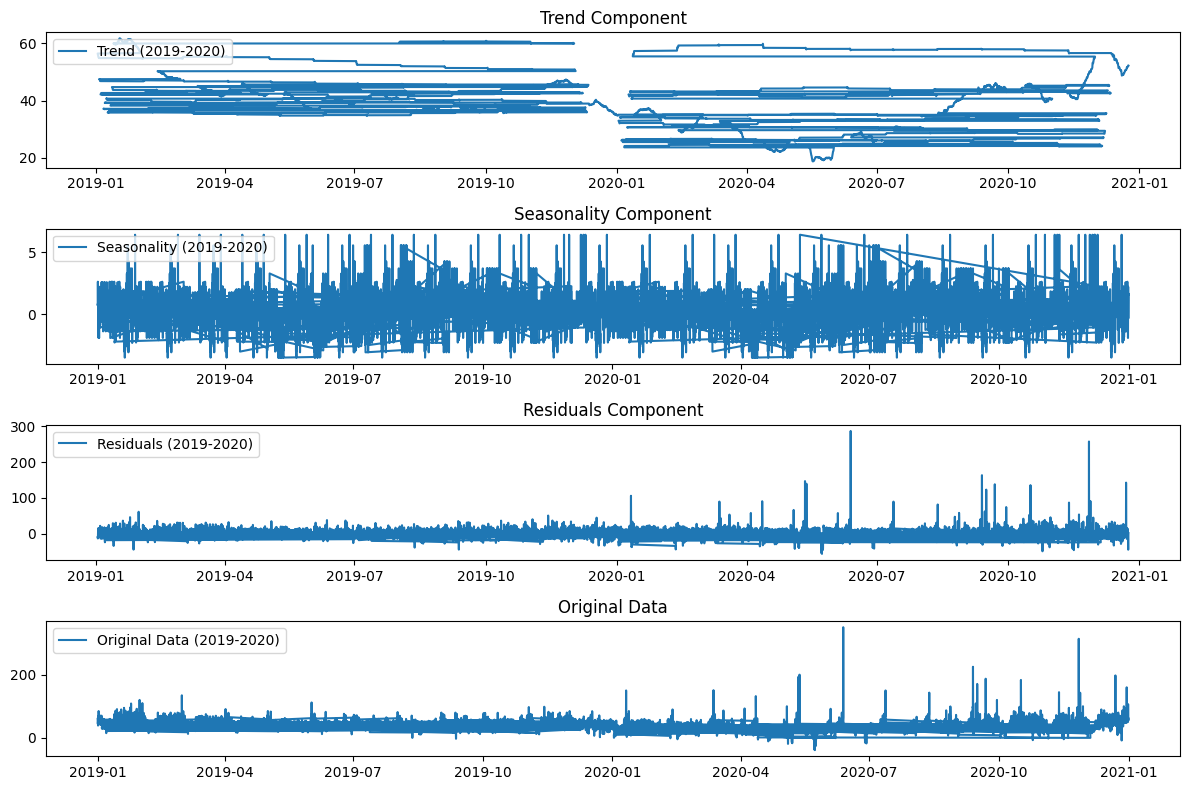

In [70]:
# Filter the DataFrame to include data for the years 2019 and 2020
gb_dataset_2019 = gb_dataset[gb_dataset['Datetime'].dt.year == 2019]
gb_dataset_2020 = gb_dataset[gb_dataset['Datetime'].dt.year == 2020]

# Combine the data for both years
combined_data = pd.concat([gb_dataset_2019, gb_dataset_2020])

# Set the 'Datetime' column as the index for the combined dataset
combined_data.set_index('Datetime', inplace=True)

# Fill missing values with linear interpolation
combined_data['gb_price'].interpolate(method='linear', inplace=True)

# Perform seasonal decomposition for the combined data
decomposition_combined = sm.tsa.seasonal_decompose(combined_data['gb_price'],
                                                   model='additive', period=365)

# Plot the decomposed components for both years
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition_combined.trend, label='Trend (2019-2020)')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(412)
plt.plot(decomposition_combined.seasonal, label='Seasonality (2019-2020)')
plt.legend(loc='upper left')
plt.title('Seasonality Component')

plt.subplot(413)
plt.plot(decomposition_combined.resid, label='Residuals (2019-2020)')
plt.legend(loc='upper left')
plt.title('Residuals Component')

plt.subplot(414)
plt.plot(combined_data['gb_price'], label='Original Data (2019-2020)')
plt.legend(loc='upper left')
plt.title('Original Data')

plt.tight_layout()
plt.show()

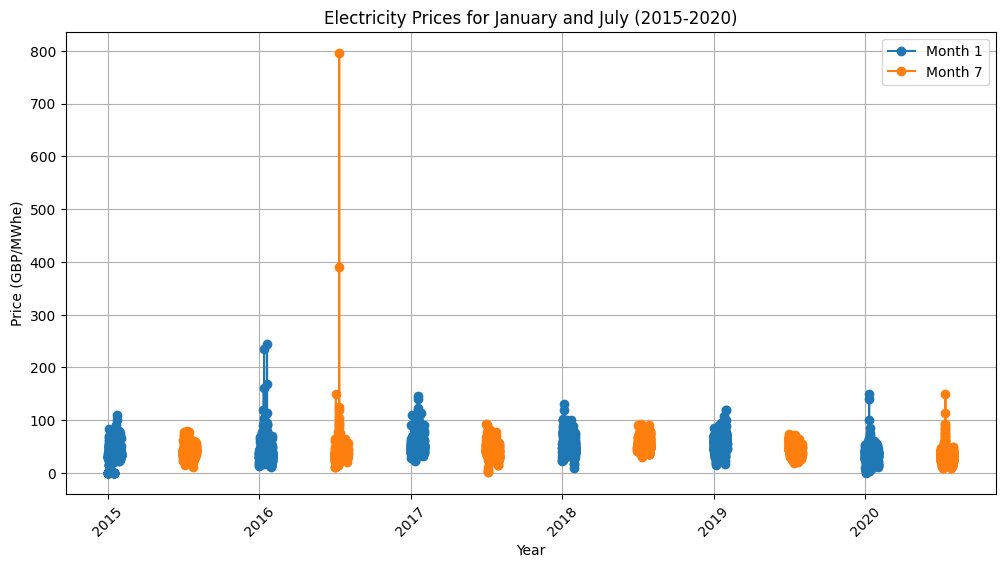

In [71]:
# Filter the DataFrame to include data from 2015 to 2020
gb_dataset_seasonal = gb_dataset[(gb_dataset['Datetime'].dt.year >= 2015) &
                                 (gb_dataset['Datetime'].dt.year <= 2020)]

# Extract the month from the 'Datetime' column
gb_dataset_seasonal['Month'] = gb_dataset_seasonal['Datetime'].dt.month

# Define the months of interest (January and July)
months_of_interest = [1, 7]

# Filter the data for the specified months
selected_months_data = gb_dataset_seasonal[gb_dataset_seasonal['Month'].isin(months_of_interest)]

# Group the data by year and month, and calculate the average price for each group
monthly_avg_prices = selected_months_data.groupby(['Datetime', 'Month'])['gb_price'].mean().reset_index()

# Pivot the data to have years as columns and months as rows
pivot_table = monthly_avg_prices.pivot(index='Month', columns='Datetime',
                                       values='gb_price')

# Create a line plot to show electricity prices for each January and July
plt.figure(figsize=(12, 6))
for month in months_of_interest:
    plt.plot(pivot_table.columns, pivot_table.loc[month],
             label=f'Month {month}', marker='o')

plt.title('Electricity Prices for January and July (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Price (GBP/MWhe)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### Predicted Prices vs. True Prices - LR model

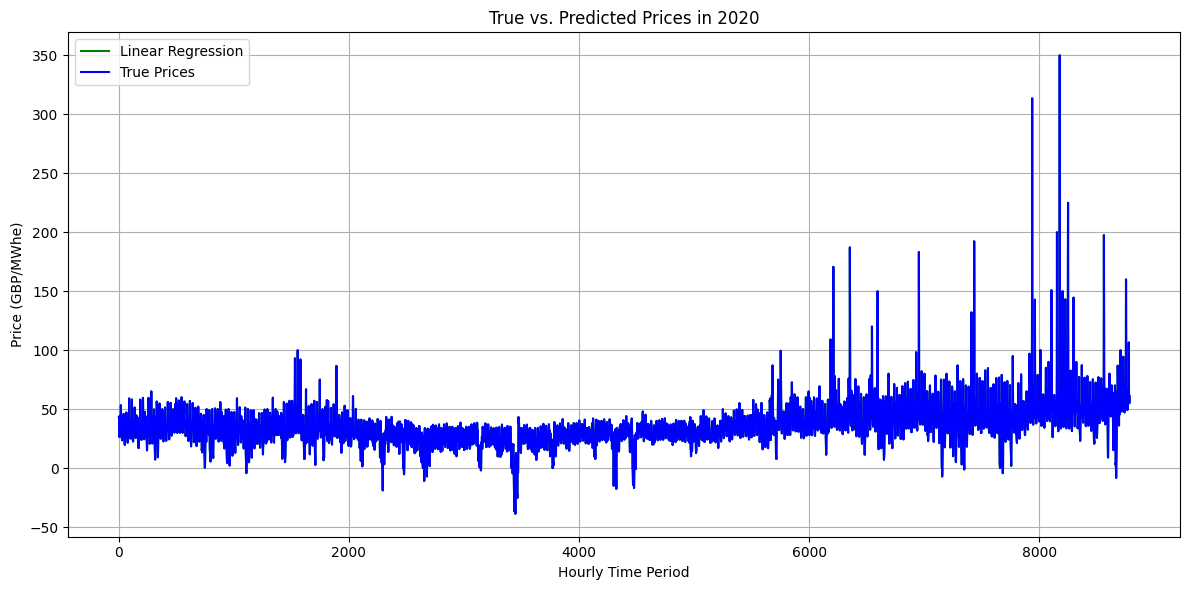

In [72]:
# true 2020 hourly prices
true_prices = test_data['gb_price']

# LR predicted prices
linear_regression_predictions = lr_predicted_2020_prices

# Create a list of hours
hours = range(1, len(true_prices) + 1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the predicted prices for each model
ax.plot(hours, linear_regression_predictions, label='Linear Regression',
        linestyle='-',  color='g')

# Plot the true 2020 hourly prices
ax.plot(hours, true_prices, label='True Prices', linestyle='-', color='b')

# Set plot labels and title
ax.set_xlabel('Hourly Time Period')
ax.set_ylabel('Price (GBP/MWhe)')
ax.set_title('True vs. Predicted Prices in 2020')

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Predicted Prices vs. True Prices - all models

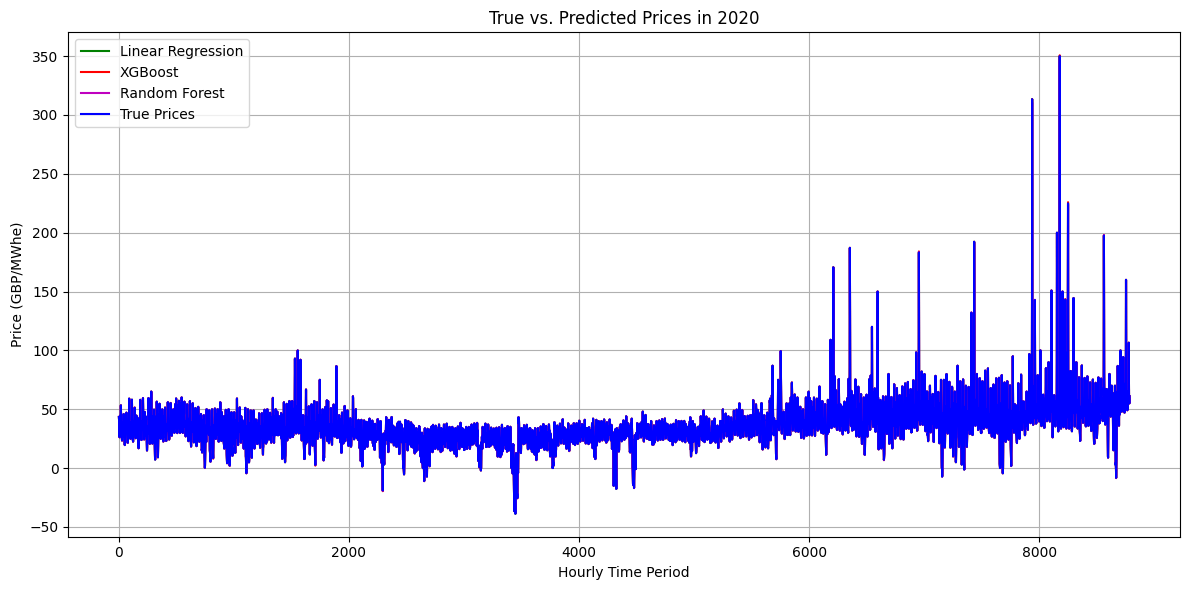

In [73]:
# true 2020 hourly prices
true_prices = test_data['gb_price']

# predicted prices by each model
linear_regression_predictions = lr_predicted_2020_prices
xgboost_predictions = xgb_predicted_2020_prices
random_forest_predictions = rf_predicted_2020_prices

# Create a list of hours
hours = range(1, len(true_prices) + 1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the predicted prices for each model
ax.plot(hours, linear_regression_predictions, label='Linear Regression',
        linestyle='-',  color='g')
ax.plot(hours, xgboost_predictions, label='XGBoost',
        linestyle='-', color='r')
ax.plot(hours, random_forest_predictions, label='Random Forest',
        linestyle='-',  color='m')

# Plot the true 2020 hourly prices
ax.plot(hours, true_prices, label='True Prices', linestyle='-', color='b')

# Set plot labels and title
ax.set_xlabel('Hourly Time Period')
ax.set_ylabel('Price (GBP/MWhe)')
ax.set_title('True vs. Predicted Prices in 2020')

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Appendix

1.   
  - LSTM requires vast amounts of data,
  - LSTM requires data to exhibit stationarity (EDA visualisation showed the stationarity requirement is unlikely to be filled; i.e. mean and variance did not look constant over the time period),
  - LSTM requires data preprocessing, setting sequence length, hyperparameter tuning etc... to get the most out of the technique, without spending time doing this (not possible for this project), the benefits over other techniques are unlikely to be seen
  - Price spikes (such as those seen in 2016) to too rare to be captured in the model accurately,
  - I concluded that ARIMA/machine learning techniques could give good enough results and have fewer requirements.
  
  A commonly used time-series technique is ARIMA modelling - this technique uses it's own historic data to forecast a time series. ARIMA modelling does not make use of the additional features provided. In addition, it requires data to be stationary (no trends or seasonality). I created some visualisations to show the time-series, they show how the data exhibits trends and seasonality where daily prices are highest between 16.00 and 20.00 - this is a trend, another plot shows how typically July prices are cheaper than January prices and a seasonality decomposition shows there is seasonality in the data. For these reasons ARIMA modelling is not suitable. I did however run an ARIMA model during exploration (see below) and the evaluation metrics were poor (low R squared, high RMSE, high MAE - both in absolute terms in relative to the models above) confirming that this technique is ill-suited to this task.

  Therefore machine learning methods were the most suitable. They also allow for multivariate relationships to be explored. I decided to explore linear regression, XGBoost and Random Forest modelling. Linear regression has the advantage of being efficient to run and easy to interpret (with the ability to isolate the impacts of each featute) however it does require several assumptions to be met - linear relationships, lack of outliers so it does require some pre-analysis to be done. XGBoost is a model created to be highly accurate, it works with various types of relationships between outcome and predictor variable, is less sensitive to changing data characteristic and outliers and its model prevents overfitting. It provides is more computationally intensive but running it on Google Colab mitigates this risk. Lastly, I explored Random Forest which shares a number of the advantages XGBoost has.

### Model 4 - ARIMA

In [74]:
# ARIMA model

electricity_data = gb_dataset

# Split the data into training and testing datasets based on date
train_data = electricity_data[electricity_data['Datetime'].dt.year < 2020]
test_data = electricity_data[electricity_data['Datetime'].dt.year == 2020]

# Train the ARIMA model
def train_arima_model(train_data, features, order):
    # Create a DataFrame with only the selected features
    train_data = train_data[['Datetime'] + features]

    # Set the 'Datetime' column as the index
    train_data.set_index('Datetime', inplace=True)

    # Create and fit the ARIMA model
    model = ARIMA(train_data['gb_price'], order=order)
    model_fit = model.fit()

    return model_fit

# Define the ARIMA model order (p, d, q)
# un-tuned
p, d, q = 1, 1, 1

arima_model = train_arima_model(train_data, features, order=(p, d, q))

# Make predictions on the test set
def predict_arima_model(model_fit, test_data, features):
    # Create a DataFrame with only the selected features
    test_data = test_data[['Datetime'] + features]

    # Set the 'Datetime' column as the index
    test_data.set_index('Datetime', inplace=True)

    # Make predictions
    y_pred = model_fit.forecast(steps=len(test_data))

    return y_pred

arima_predictions = predict_arima_model(arima_model, test_data, features)

# Evaluate the ARIMA model
def evaluate_arima_model(test_data, predictions):
    # Calculate RMSE, R-squared, and MAE
    rmse = np.sqrt(mean_squared_error(test_data['gb_price'], predictions))
    r2 = r2_score(test_data['gb_price'], predictions)
    mae = mean_absolute_error(test_data['gb_price'], predictions)

    return rmse, r2, mae

rmse, r2, mae = evaluate_arima_model(test_data, arima_predictions)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# train the final ARIMA model on the full dataset
final_arima_model = train_arima_model(electricity_data, features, order=(p, d, q))

# Predict electricity prices for 2020
final_arima_predictions = predict_arima_model(final_arima_model, test_data, features)

# Round predicted prices to 1 decimal place
final_arima_predictions = np.round(final_arima_predictions, 1)

# Create a DataFrame with datetime and predicted prices
arima_results_df = pd.DataFrame({'Datetime': test_data.index,
                                 'Price': final_arima_predictions})

# Save results to CSV
save_outputs = False

if save_outputs==True:
  arima_results_df.to_csv(output_path + 'predicted_prices_2020_arima.csv',
                          index=False)

Root Mean Squared Error (RMSE): 16.87
R-squared: -0.02
Mean Absolute Error (MAE): 11.49
